In [13]:
import pandas as pd
import numpy as np
import os

In [18]:
# Load the dataset by escaping the backslashes
data = pd.read_csv("C:\\Users\\dhami\\Downloads\\bank.csv", delimiter=',')


In [16]:
# Print dataset information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [17]:
# Print descriptive statistics
print(data.describe().T)

            count         mean          std     min    25%    50%      75%  \
age       11162.0    41.231948    11.913369    18.0   32.0   39.0    49.00   
balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00   
day       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00   
duration  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   
campaign  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00   
pdays     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75   
previous  11162.0     0.832557     2.292007     0.0    0.0    0.0     1.00   

              max  
age          95.0  
balance   81204.0  
day          31.0  
duration   3881.0  
campaign     63.0  
pdays       854.0  
previous     58.0  


<Axes: xlabel='deposit'>

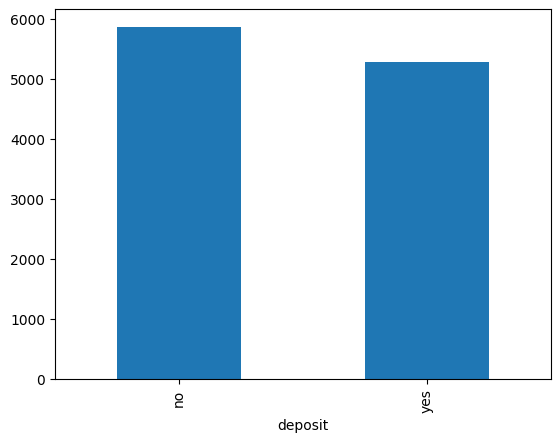

In [19]:
data.deposit.value_counts().plot(kind='bar')

In [20]:
object_cols = ["job", "marital", "education", "default", 
               "housing", "loan", "contact", "month", "deposit", "poutcome"]
for col in object_cols:
    print(data[col].value_counts())
    print("\n\n")

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64



marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64



education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64



default
no     10994
yes      168
Name: count, dtype: int64



housing
no     5881
yes    5281
Name: count, dtype: int64



loan
no     9702
yes    1460
Name: count, dtype: int64



contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64



month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64



deposit
no     5873
yes    5289
Name: count, dtype: 

In [21]:
binary_variables = ["deposit", "loan", "housing","default"]
for var in binary_variables:
    data[var] = data[var].map({"yes" : 1, "no" : 0})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  int64 
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int64 
 7   loan       11162 non-null  int64 
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 1.4+ MB


In [22]:
education_dict = {
    "unknown" : 0, 
    "primary" : 1, 
    "secondary" : 2, 
    "tertiary" : 3
}
data["education"] = data["education"].map(education_dict)
data["education"].value_counts()

education
2    5476
3    3689
1    1500
0     497
Name: count, dtype: int64

In [23]:
poutcome_dict = {
    "unknown" : 0, 
    "failure" : 1, 
    "other" : 2, 
    "success" : 3
}
data["poutcome"] = data["poutcome"].map(poutcome_dict)
data["poutcome"].value_counts()

poutcome
0    8326
1    1228
3    1071
2     537
Name: count, dtype: int64

In [24]:
data = pd.get_dummies(data, columns=["job", "marital", "contact", "month"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                11162 non-null  int64
 1   education          11162 non-null  int64
 2   default            11162 non-null  int64
 3   balance            11162 non-null  int64
 4   housing            11162 non-null  int64
 5   loan               11162 non-null  int64
 6   day                11162 non-null  int64
 7   duration           11162 non-null  int64
 8   campaign           11162 non-null  int64
 9   pdays              11162 non-null  int64
 10  previous           11162 non-null  int64
 11  poutcome           11162 non-null  int64
 12  deposit            11162 non-null  int64
 13  job_admin.         11162 non-null  bool 
 14  job_blue-collar    11162 non-null  bool 
 15  job_entrepreneur   11162 non-null  bool 
 16  job_housemaid      11162 non-null  bool 
 17  job_manageme

In [25]:
num_features = ["age", "balance", "day", "duration", 
                "campaign", "pdays", "previous", "poutcome", "education"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[num_features] = scaler.fit_transform(data[num_features])
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,0.301714,0.154719,0.0,0.181818,0.272727,0.402597,1.0
education,11162.0,0.702353,0.264907,0.0,0.666667,0.666667,1.000000,1.0
default,11162.0,0.015051,0.121761,0.0,0.000000,0.000000,0.000000,1.0
balance,11162.0,0.095121,0.036631,0.0,0.079147,0.084008,0.097160,1.0
housing,11162.0,0.473123,0.499299,0.0,0.000000,0.000000,1.000000,1.0
loan,11162.0,0.130801,0.337198,0.0,0.000000,0.000000,0.000000,1.0
day,11162.0,0.488601,0.280691,0.0,0.233333,0.466667,0.700000,1.0
duration,11162.0,0.095384,0.089489,0.0,0.035061,0.065223,0.127352,1.0
campaign,11162.0,0.024329,0.043904,0.0,0.000000,0.016129,0.032258,1.0
pdays,11162.0,0.061205,0.127203,0.0,0.000000,0.000000,0.025439,1.0


In [26]:
X, y = data.drop("deposit", axis=1), data.deposit
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=54)

In [27]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=54)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_pred))

0.7819077474249888


In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


kf = KFold(n_splits=5, shuffle=True, random_state=54)
clf = DecisionTreeClassifier(random_state=54)
clf_params = {
    "max_depth" : np.arange(3, 17, 1),
    "min_samples_split" : np.arange(10, 50, 1),
    "min_samples_leaf" : np.arange(1, 10, 1),
    "max_features" :  np.arange(1, 21, 1)
    
}
clf_grid = RandomizedSearchCV(clf, clf_params, cv=kf, scoring='accuracy', random_state=54)
clf_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=54, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=54),
                   param_distributions={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])},
                   random_state=54, scoring='accuracy')

In [30]:
print("best params: ", clf_grid.best_params_)

print("best model: ",clf_grid.best_estimator_)


best params:  {'min_samples_split': 42, 'min_samples_leaf': 3, 'max_features': 18, 'max_depth': 10}
best model:  DecisionTreeClassifier(max_depth=10, max_features=18, min_samples_leaf=3,
                       min_samples_split=42, random_state=54)


In [31]:
y_pred = clf_grid.predict(X_valid)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_pred))

0.8356471115091805


In [32]:
pd.DataFrame(clf_grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.012726,0.022437,0.013204,0.007902,0.006416,0.0103,0.029401,0.018068,0.006586,0.008387
std_fit_time,0.004633,0.015415,0.003213,0.005213,0.004399,0.005229,0.00792,0.002937,0.006225,0.006642
mean_score_time,0.005217,0.002637,0.000737,0.001851,0.00176,0.001779,0.003796,0.002302,0.005897,0.001611
std_score_time,0.001559,0.005275,0.000916,0.002732,0.00144,0.003138,0.005107,0.004604,0.007264,0.002006
param_min_samples_split,25,28,49,33,11,34,42,35,11,43
param_min_samples_leaf,3,1,9,3,9,2,3,3,1,6
param_max_features,3,11,10,15,1,13,18,14,18,1
param_max_depth,13,14,11,3,16,4,10,14,4,15
params,"{'min_samples_split': 25, 'min_samples_leaf': ...","{'min_samples_split': 28, 'min_samples_leaf': ...","{'min_samples_split': 49, 'min_samples_leaf': ...","{'min_samples_split': 33, 'min_samples_leaf': ...","{'min_samples_split': 11, 'min_samples_leaf': ...","{'min_samples_split': 34, 'min_samples_leaf': ...","{'min_samples_split': 42, 'min_samples_leaf': ...","{'min_samples_split': 35, 'min_samples_leaf': ...","{'min_samples_split': 11, 'min_samples_leaf': ...","{'min_samples_split': 43, 'min_samples_leaf': ..."
split0_test_score,0.745241,0.81187,0.81187,0.768197,0.642217,0.789474,0.820829,0.81467,0.783315,0.653975


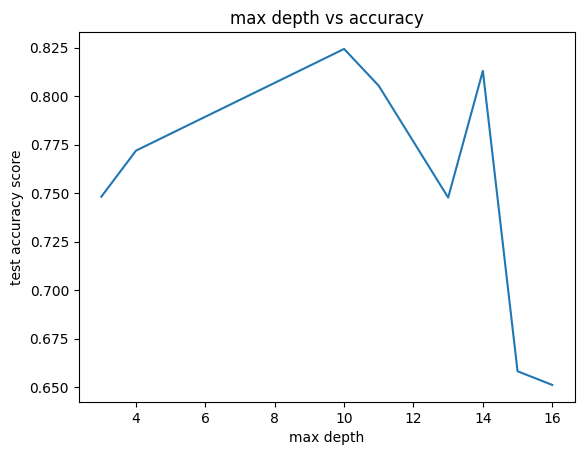

In [33]:
import matplotlib.pyplot as plt
results_df = pd.DataFrame(clf_grid.cv_results_)
plt.plot(results_df[["param_max_depth", "mean_test_score"]].groupby("param_max_depth").max())

plt.xlabel('max depth')
plt.ylabel('test accuracy score')
plt.title('max depth vs accuracy')
plt.show()

                         mean_test_score
param_min_samples_split                 
11                              0.771868
25                              0.747677
28                              0.812968
33                              0.748124
34                              0.767051
35                              0.812633
42                              0.824280
43                              0.658189
49                              0.805239


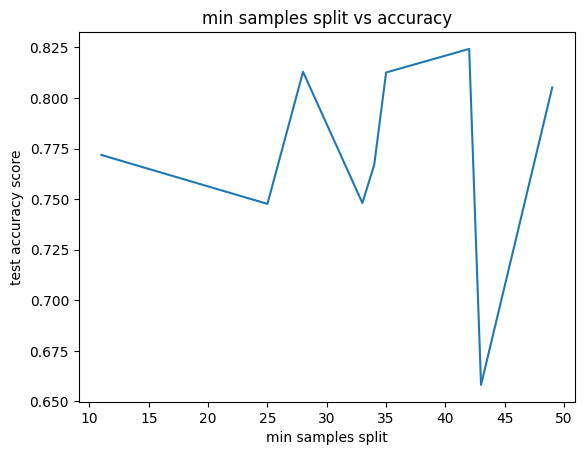

In [34]:
results_df = pd.DataFrame(clf_grid.cv_results_)
plt.plot(results_df[["param_min_samples_split", "mean_test_score"]].groupby("param_min_samples_split").max())
print(results_df[["param_min_samples_split", "mean_test_score"]].groupby("param_min_samples_split").max())

plt.xlabel('min samples split')
plt.ylabel('test accuracy score')
plt.title('min samples split vs accuracy')
plt.show()

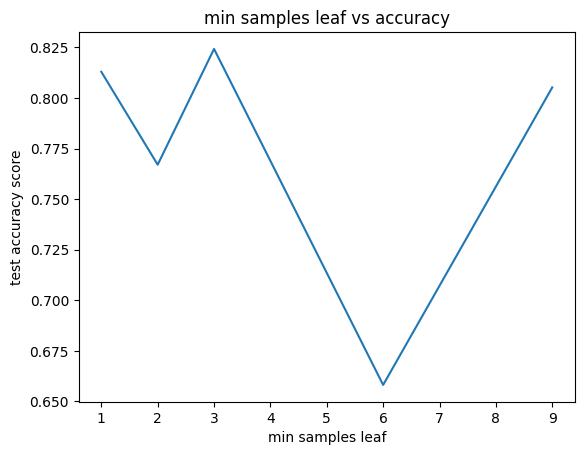

In [35]:
results_df = pd.DataFrame(clf_grid.cv_results_)
plt.plot(results_df[["param_min_samples_leaf", "mean_test_score"]].groupby("param_min_samples_leaf").max())

plt.xlabel('min samples leaf')
plt.ylabel('test accuracy score')
plt.title('min samples leaf vs accuracy')
plt.show()

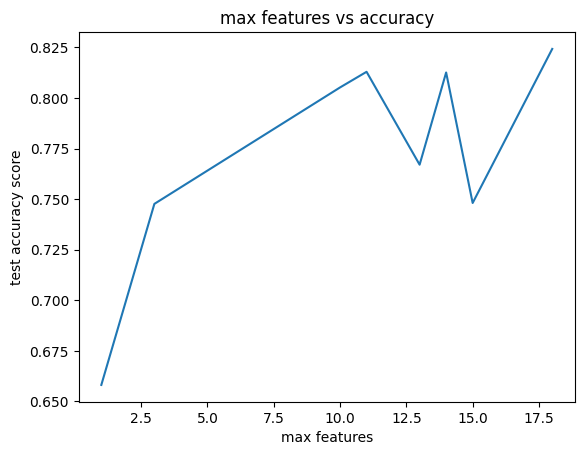

In [36]:
results_df = pd.DataFrame(clf_grid.cv_results_)
plt.plot(results_df[["param_max_features", "mean_test_score"]].groupby("param_max_features").max())

plt.xlabel('max features')
plt.ylabel('test accuracy score')
plt.title('max features vs accuracy')
plt.show()

In [37]:
clf = DecisionTreeClassifier(max_depth=10, max_features=18, min_samples_leaf=3,
                       min_samples_split=42, random_state=54)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=18, min_samples_leaf=3,
                       min_samples_split=42, random_state=54)

In [38]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': np.round(clf.feature_importances_, 3)}).sort_values('importance', ascending=False)
feature_importances

,feature,importance
7,duration,0.548
11,poutcome,0.065
29,contact_unknown,0.060
4,housing,0.049
10,previous,0.038
0,age,0.035
6,day,0.026
37,month_mar,0.022
3,balance,0.021
38,month_may,0.018


In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=54)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_valid)
print(accuracy_score(y_valid, y_pred))

0.8526645768025078


In [40]:
kf = KFold(n_splits=5, shuffle=True, random_state=54)
rf = RandomForestClassifier(random_state=54)
rf_params = {
    "n_estimators" : np.arange(100, 300, 50),
    
}
rf_grid = GridSearchCV(rf, rf_params, cv=kf, scoring='accuracy', n_jobs=10) # кросс-валидация по 5 блокам
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=54, shuffle=True),
             estimator=RandomForestClassifier(random_state=54), n_jobs=10,
             param_grid={'n_estimators': array([100, 150, 200, 250])},
             scoring='accuracy')

In [41]:
pd.DataFrame(rf_grid.cv_results_).T

,0,1,2,3
mean_fit_time,1.212065,1.850788,2.432183,2.74831
std_fit_time,0.029121,0.008086,0.048243,0.024252
mean_score_time,0.03979,0.05685,0.064415,0.070259
std_score_time,0.003985,0.008819,0.001548,0.005352
param_n_estimators,100,150,200,250
params,{'n_estimators': 100},{'n_estimators': 150},{'n_estimators': 200},{'n_estimators': 250}
split0_test_score,0.854983,0.852184,0.851064,0.854423
split1_test_score,0.868981,0.867301,0.867861,0.870101
split2_test_score,0.854423,0.856103,0.854423,0.857783
split3_test_score,0.855543,0.858343,0.858343,0.858903


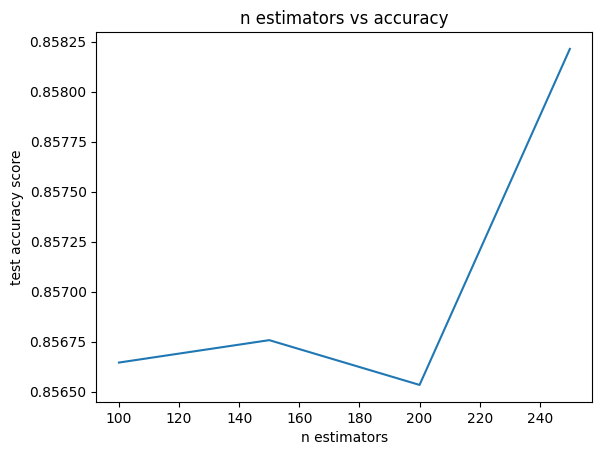

In [42]:
results_df = pd.DataFrame(rf_grid.cv_results_)
plt.plot(results_df[["param_n_estimators", "mean_test_score"]].groupby("param_n_estimators").max())

plt.xlabel('n estimators')
plt.ylabel('test accuracy score')
plt.title('n estimators vs accuracy')
plt.show()

In [43]:
kf = KFold(n_splits=5, shuffle=True, random_state=54)
rf = RandomForestClassifier(random_state=54)
rf_params = {
    "max_depth" : np.arange(3, 13, 1),
    
}
rf_grid = GridSearchCV(rf, rf_params, cv=kf, scoring='accuracy', n_jobs=10) # кросс-валидация по 5 блокам
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=54, shuffle=True),
             estimator=RandomForestClassifier(random_state=54), n_jobs=10,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])},
             scoring='accuracy')

In [44]:
pd.DataFrame(rf_grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.425864,0.558521,0.512303,0.535402,0.59392,0.642967,0.709984,0.753998,0.82213,0.82364
std_fit_time,0.058833,0.0361,0.013087,0.017412,0.029333,0.010865,0.017088,0.011566,0.006744,0.023816
mean_score_time,0.017734,0.02335,0.016623,0.020326,0.01887,0.023781,0.023906,0.027798,0.021659,0.020907
std_score_time,0.005898,0.006583,0.002815,0.006189,0.005154,0.00547,0.003888,0.003703,0.001851,0.005096
param_max_depth,3,4,5,6,7,8,9,10,11,12
params,{'max_depth': 3},{'max_depth': 4},{'max_depth': 5},{'max_depth': 6},{'max_depth': 7},{'max_depth': 8},{'max_depth': 9},{'max_depth': 10},{'max_depth': 11},{'max_depth': 12}
split0_test_score,0.793953,0.804031,0.818589,0.831467,0.838746,0.837626,0.843785,0.842105,0.847704,0.849384
split1_test_score,0.788914,0.821389,0.819149,0.831467,0.847144,0.851624,0.854423,0.854983,0.856103,0.860582
split2_test_score,0.770437,0.787234,0.795073,0.818589,0.829227,0.836506,0.839866,0.844905,0.844345,0.851624
split3_test_score,0.782195,0.798432,0.800672,0.823628,0.833147,0.839866,0.845465,0.848264,0.846025,0.849384


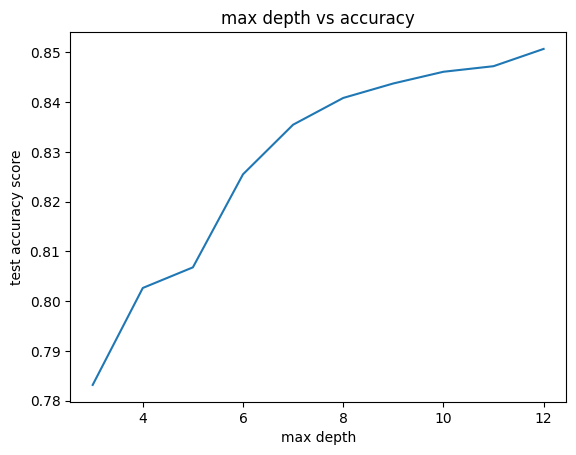

In [45]:
results_df = pd.DataFrame(rf_grid.cv_results_)
plt.plot(results_df[["param_max_depth", "mean_test_score"]].groupby("param_max_depth").max())

plt.xlabel('max depth')
plt.ylabel('test accuracy score')
plt.title('max depth vs accuracy')
plt.show()

In [47]:
kf = KFold(n_splits=5, shuffle=True, random_state=54)
rf = RandomForestClassifier(random_state=54)
rf_params = {
    "min_samples_split" : np.arange(10, 50, 1),
    
}
rf_grid = GridSearchCV(rf, rf_params, cv=kf, scoring='accuracy', n_jobs=10) # кросс-валидация по 5 блокам
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=54, shuffle=True),
             estimator=RandomForestClassifier(random_state=54), n_jobs=10,
             param_grid={'min_samples_split': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])},
             scoring='accuracy')

In [50]:
print("best params: ", rf_grid.best_params_)

print("best model: ",rf_grid.best_estimator_)

best params:  {'min_samples_split': 13}
best model:  RandomForestClassifier(min_samples_split=13, random_state=54)


In [51]:
pd.DataFrame(rf_grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
mean_fit_time,1.280312,1.251097,1.044163,1.039971,1.027868,1.005844,0.985684,0.99383,0.985072,0.973321,...,0.87633,0.882068,0.848663,0.861809,0.862755,0.862467,0.850115,0.852838,0.836442,0.809776
std_fit_time,0.1156,0.078169,0.025686,0.015369,0.030582,0.015503,0.025989,0.019208,0.014723,0.015657,...,0.020221,0.021141,0.012135,0.018931,0.022872,0.021244,0.017731,0.018887,0.024707,0.038372
mean_score_time,0.041483,0.034317,0.036054,0.033025,0.035874,0.037134,0.037007,0.027039,0.0311,0.03169,...,0.028406,0.029633,0.026926,0.029945,0.027699,0.025575,0.022382,0.02795,0.028679,0.020752
std_score_time,0.004574,0.003708,0.004392,0.007741,0.006285,0.003976,0.005322,0.001965,0.002443,0.002859,...,0.002827,0.003082,0.004293,0.002266,0.001553,0.005421,0.00166,0.00403,0.003464,0.003214
param_min_samples_split,10,11,12,13,14,15,16,17,18,19,...,40,41,42,43,44,45,46,47,48,49
params,{'min_samples_split': 10},{'min_samples_split': 11},{'min_samples_split': 12},{'min_samples_split': 13},{'min_samples_split': 14},{'min_samples_split': 15},{'min_samples_split': 16},{'min_samples_split': 17},{'min_samples_split': 18},{'min_samples_split': 19},...,{'min_samples_split': 40},{'min_samples_split': 41},{'min_samples_split': 42},{'min_samples_split': 43},{'min_samples_split': 44},{'min_samples_split': 45},{'min_samples_split': 46},{'min_samples_split': 47},{'min_samples_split': 48},{'min_samples_split': 49}
split0_test_score,0.856103,0.850504,0.855543,0.855543,0.852744,0.849944,0.852184,0.849384,0.852744,0.852744,...,0.846585,0.848264,0.849384,0.848264,0.852184,0.849384,0.849384,0.853863,0.847704,0.848824
split1_test_score,0.866181,0.868421,0.870661,0.870661,0.870661,0.867301,0.867861,0.868981,0.868981,0.866181,...,0.865622,0.866181,0.863382,0.862822,0.862822,0.863942,0.865622,0.866181,0.864502,0.861142
split2_test_score,0.856663,0.854983,0.856663,0.856663,0.857223,0.858903,0.852744,0.854983,0.856103,0.851064,...,0.856663,0.853303,0.855543,0.851064,0.848264,0.854423,0.856103,0.855543,0.854983,0.848824
split3_test_score,0.857223,0.856663,0.854983,0.854423,0.857783,0.857223,0.849384,0.854983,0.856103,0.855543,...,0.849944,0.852744,0.850504,0.852184,0.854983,0.854983,0.852184,0.849944,0.850504,0.848264


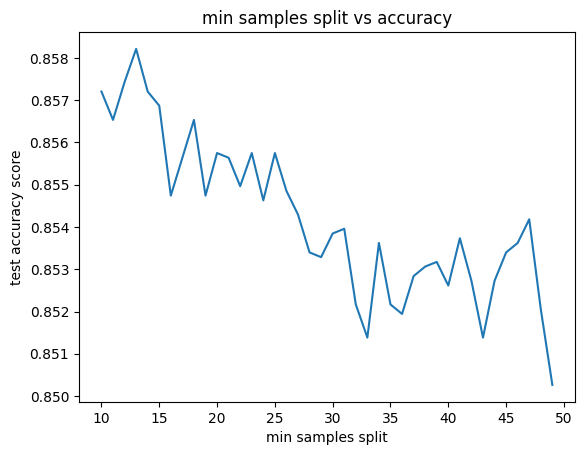

In [52]:
results_df = pd.DataFrame(rf_grid.cv_results_)
plt.plot(results_df[["param_min_samples_split", "mean_test_score"]].groupby("param_min_samples_split").max())

plt.xlabel('min samples split')
plt.ylabel('test accuracy score')
plt.title('min samples split vs accuracy')
plt.show()

In [53]:
kf = KFold(n_splits=5, shuffle=True, random_state=54)
rf = RandomForestClassifier(random_state=54)
rf_params = {

    "min_samples_leaf" : np.arange(1, 10, 1),
    
}
rf_grid = GridSearchCV(rf, rf_params, cv=kf, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=54, shuffle=True),
             estimator=RandomForestClassifier(random_state=54),
             param_grid={'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [54]:
print("best params: ", rf_grid.best_params_)

print("best model: ",rf_grid.best_estimator_)

best params:  {'min_samples_leaf': 3}
best model:  RandomForestClassifier(min_samples_leaf=3, random_state=54)


In [55]:
pd.DataFrame(rf_grid.cv_results_).T

,0,1,2,3,4,5,6,7,8
mean_fit_time,0.831523,0.736654,0.707742,0.644338,0.638475,0.589357,0.634276,0.565518,0.711457
std_fit_time,0.055057,0.02784,0.027707,0.02205,0.036208,0.007684,0.070055,0.07334,0.340025
mean_score_time,0.024525,0.026325,0.024692,0.022522,0.025878,0.024552,0.01946,0.018031,0.03633
std_score_time,0.007284,0.005594,0.006801,0.004957,0.005258,0.006527,0.004221,0.005324,0.030115
param_min_samples_leaf,1,2,3,4,5,6,7,8,9
params,{'min_samples_leaf': 1},{'min_samples_leaf': 2},{'min_samples_leaf': 3},{'min_samples_leaf': 4},{'min_samples_leaf': 5},{'min_samples_leaf': 6},{'min_samples_leaf': 7},{'min_samples_leaf': 8},{'min_samples_leaf': 9}
split0_test_score,0.854983,0.851064,0.850504,0.849944,0.851624,0.850504,0.849384,0.846585,0.846025
split1_test_score,0.868981,0.865622,0.870101,0.864502,0.863942,0.864502,0.865062,0.862822,0.865062
split2_test_score,0.854423,0.855543,0.855543,0.854423,0.853303,0.852184,0.856103,0.850504,0.849944
split3_test_score,0.855543,0.852184,0.857223,0.853303,0.847144,0.849384,0.846585,0.843225,0.843785


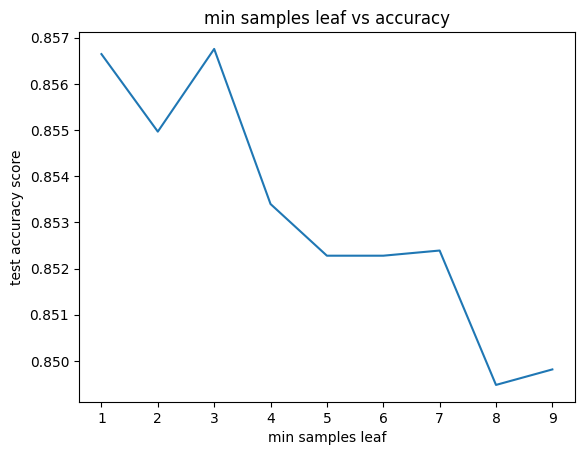

In [56]:
results_df = pd.DataFrame(rf_grid.cv_results_)
plt.plot(results_df[["param_min_samples_leaf", "mean_test_score"]].groupby("param_min_samples_leaf").max())

plt.xlabel('min samples leaf')
plt.ylabel('test accuracy score')
plt.title('min samples leaf vs accuracy')
plt.show()

In [57]:
kf = KFold(n_splits=5, shuffle=True, random_state=54)
rf = RandomForestClassifier(random_state=54)
rf_params = {
    "max_features" :  np.arange(1, 15, 1)
}
rf_grid = GridSearchCV(rf, rf_params, cv=kf, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=54, shuffle=True),
             estimator=RandomForestClassifier(random_state=54),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy')

In [58]:
print("best params: ", rf_grid.best_params_)

print("best model: ",rf_grid.best_estimator_)

best params:  {'max_features': 8}
best model:  RandomForestClassifier(max_features=8, random_state=54)


In [59]:
pd.DataFrame(rf_grid.cv_results_).T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
mean_fit_time,0.678801,0.585277,0.720742,0.781753,2.510488,0.903236,0.996617,1.126156,2.13221,1.804535,1.281825,4.44851,3.158203,1.512995
std_fit_time,0.176457,0.025104,0.028731,0.091066,0.632571,0.039691,0.04224,0.076399,1.365842,1.302391,0.094933,1.248447,1.51151,0.037433
mean_score_time,0.037043,0.03039,0.03439,0.038077,0.113535,0.033111,0.030863,0.026767,0.062452,0.032783,0.024437,0.132086,0.057396,0.034544
std_score_time,0.003361,0.002519,0.002131,0.006617,0.044858,0.00285,0.008518,0.004865,0.0381,0.016508,0.010997,0.015961,0.032616,0.005756
param_max_features,1,2,3,4,5,6,7,8,9,10,11,12,13,14
params,{'max_features': 1},{'max_features': 2},{'max_features': 3},{'max_features': 4},{'max_features': 5},{'max_features': 6},{'max_features': 7},{'max_features': 8},{'max_features': 9},{'max_features': 10},{'max_features': 11},{'max_features': 12},{'max_features': 13},{'max_features': 14}
split0_test_score,0.831467,0.837626,0.846025,0.845465,0.856103,0.854983,0.852184,0.853863,0.848264,0.851064,0.852184,0.851064,0.854983,0.854983
split1_test_score,0.849384,0.862822,0.860582,0.867301,0.860582,0.868981,0.864502,0.867861,0.865062,0.870101,0.863382,0.866181,0.866741,0.868421
split2_test_score,0.839306,0.842665,0.849944,0.856103,0.858903,0.854423,0.863382,0.855543,0.856103,0.859462,0.859462,0.858903,0.862262,0.861702
split3_test_score,0.833147,0.843225,0.848264,0.856103,0.853863,0.855543,0.854423,0.859462,0.857783,0.857783,0.857223,0.854983,0.854423,0.852744


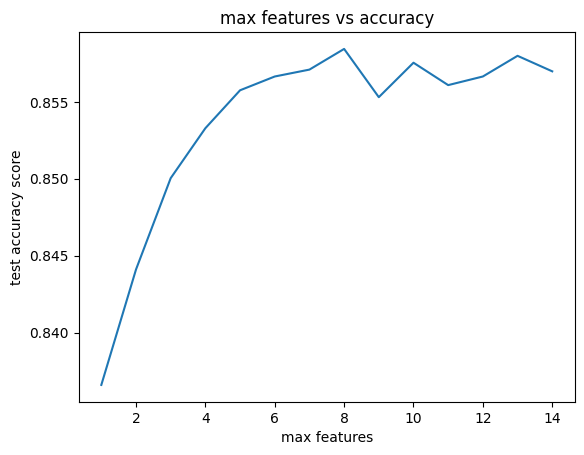

In [60]:
results_df = pd.DataFrame(rf_grid.cv_results_)
plt.plot(results_df[["param_max_features", "mean_test_score"]].groupby("param_max_features").max())

plt.xlabel('max features')
plt.ylabel('test accuracy score')
plt.title('max features vs accuracy')
plt.show()

In [61]:
rf = RandomForestClassifier(max_features=8, random_state=54, max_depth=12, n_estimators=250,
                           min_samples_leaf=3, min_samples_split=13)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=8, min_samples_leaf=3,
                       min_samples_split=13, n_estimators=250, random_state=54)

In [62]:
y_pred = rf.predict(X_valid)
print(accuracy_score(y_valid, y_pred))

0.8454993282579489


In [63]:
kf = KFold(n_splits=5, shuffle=True, random_state=54)
rf = RandomForestClassifier(random_state=54)
rf_params = {
    "n_estimators": np.arange(100, 350, 50),
    "max_depth" : np.arange(3, 13, 1),
    "min_samples_split" : np.arange(10, 50, 1),
    "min_samples_leaf" : np.arange(1, 10, 1),
    "max_features" :  np.arange(1, 21, 1)
    
}
rf_grid = RandomizedSearchCV(rf, rf_params, cv=kf, scoring='accuracy', random_state=54)
rf_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=54, shuffle=True),
                   estimator=RandomForestClassifier(random_state=54),
                   param_distributions={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49]),
                                        'n_estimators': array([100, 150, 200, 250, 300])},
                   random_state=54, scoring='accuracy')

In [64]:
print("best params: ", rf_grid.best_params_)

print("best model: ",rf_grid.best_estimator_)

best params:  {'n_estimators': 200, 'min_samples_split': 42, 'min_samples_leaf': 6, 'max_features': 12, 'max_depth': 12}
best model:  RandomForestClassifier(max_depth=12, max_features=12, min_samples_leaf=6,
                       min_samples_split=42, n_estimators=200, random_state=54)


In [65]:
rf = RandomForestClassifier(max_depth=12, max_features=12, min_samples_leaf=6,
                       min_samples_split=42, n_estimators=200, random_state=54)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=12, min_samples_leaf=6,
                       min_samples_split=42, n_estimators=200, random_state=54)

In [66]:
y_pred = rf.predict(X_valid)
print(accuracy_score(y_valid, y_pred))

0.8428123600537394


In [67]:
pd.DataFrame(rf_grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.190525,1.75597,5.366614,3.679657,1.142761,3.474021,0.504758,1.160859,3.389173,4.306198
std_fit_time,0.016775,0.152366,3.248719,1.473798,0.125378,1.97188,0.031653,0.425652,1.7764,2.487637
mean_score_time,0.015531,0.03669,0.100874,0.093585,0.035818,0.049381,0.024719,0.02953,0.057075,0.098793
std_score_time,0.003573,0.009681,0.064554,0.051696,0.008541,0.034819,0.003326,0.026445,0.037831,0.060994
param_n_estimators,100,200,250,200,250,150,100,100,250,300
param_min_samples_split,13,42,38,27,48,45,45,23,33,34
param_min_samples_leaf,5,6,6,5,9,1,4,1,4,1
param_max_features,1,12,20,9,5,18,5,14,12,12
param_max_depth,5,12,11,10,9,11,10,10,6,8
params,"{'n_estimators': 100, 'min_samples_split': 13,...","{'n_estimators': 200, 'min_samples_split': 42,...","{'n_estimators': 250, 'min_samples_split': 38,...","{'n_estimators': 200, 'min_samples_split': 27,...","{'n_estimators': 250, 'min_samples_split': 48,...","{'n_estimators': 150, 'min_samples_split': 45,...","{'n_estimators': 100, 'min_samples_split': 45,...","{'n_estimators': 100, 'min_samples_split': 23,...","{'n_estimators': 250, 'min_samples_split': 33,...","{'n_estimators': 300, 'min_samples_split': 34,..."


Feature ranking:
1 duration 0.49381562702781456
2 poutcome 0.08505652692563564
3 contact_telephone 0.05150243229306082
4 age 0.04315061068878811
5 pdays 0.03791172968149694
6 housing 0.035359303079916964
7 balance 0.03124788501760372
8 day 0.022153298266526414
9 month_jun 0.021787455068170303
10 marital_single 0.021581775481959355
11 previous 0.019893409810259614
12 month_jul 0.014726261428695556
13 month_nov 0.014722577113239073
14 campaign 0.013378126348318042
15 month_mar 0.012491536217366768
16 contact_unknown 0.011837940800309744
17 month_apr 0.009349122622073217
18 month_jan 0.007238522110146913
19 month_may 0.005931275610930827
20 loan 0.005347192979861089
21 education 0.004983469087433026
22 month_dec 0.004253681231708581
23 marital_married 0.003885957944284101
24 marital_divorced 0.0038842152118647322
25 month_oct 0.003481112420142983
26 job_services 0.0032653680345910495
27 contact_cellular 0.0031682637112316094
28 job_admin. 0.002933622835655928
29 month_feb 0.00236577546315

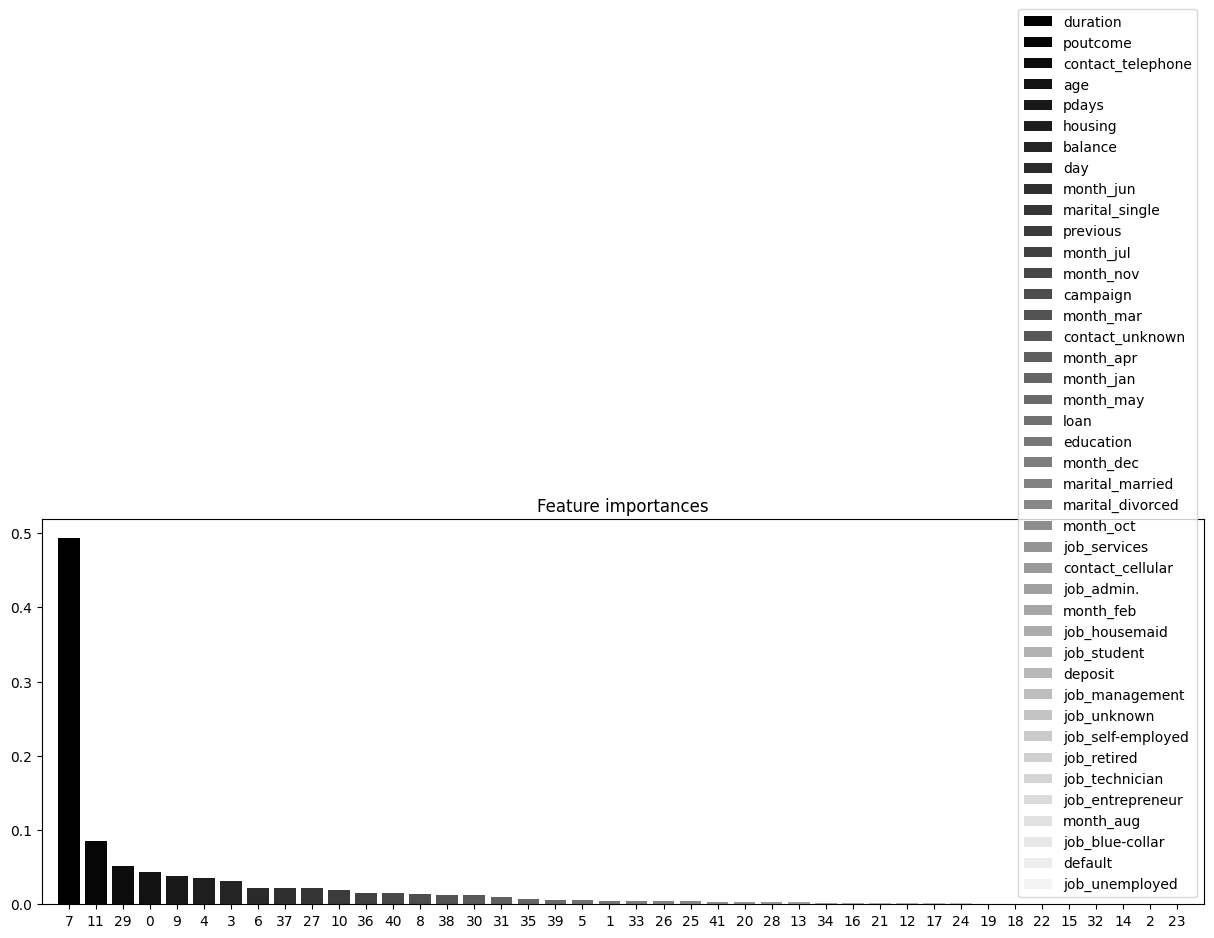

In [68]:
features = dict(zip(range(len(data.columns)-1), data.columns[:-1]))

# Важливість ознак
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = max(10, len(data.columns[:-1]))
feature_indices = [ind for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices]);